In [1]:
! pip install awswrangler

In [1]:
import awswrangler as wr
import pandas as pd
from datetime import date

In [2]:
folder_dict={'2017':['01','04'],'2018':['11','12'],'2019':['08','09'], '2020':['06','07']}

month_map={'01':'January','02':'February','03':'March','04':"April",'05':'May','06':'June','07':'July',
           '08':'August','09':'September','10':'October','11':'November','12':'December'}

col_names = ["tagname",'timestamp','value']



In [3]:
# index = pd.date_range(start='2018-01-01', end='2020-04-27', periods=10, freq='D')
def fetch_data(variable):
    
    df_var = pd.DataFrame(columns=col_names[2:])
    
   
    
    for key,value in folder_dict.items():
         
        for month in value:
            print(variable,month)
            try:
                p = f's3://stmvpdata001/connacher-extract/Algar/{key}/{month}/{variable}_{month_map[month]}{key}.csv'
            
                df = wr.s3.read_csv(path=p,
                                    names=col_names,
                                    parse_dates=["timestamp"],
                                    low_memory = False # Hint to parse these columns as date instead of strings
                                    ).filter(['timestamp','value'])
            except:
                continue
            df['timestamp'] = pd.to_datetime(df['timestamp']) 
            df = df.set_index('timestamp')
            
            df['value'] = pd.to_numeric(df['value'], errors='coerce') 
            print(df.dtypes)
            df = df.resample('60Min').agg('mean')
            df_var = pd.concat([df_var, df]) 


    return {variable: df_var}

In [4]:
df_dict = {}
variables = ['ALGARO.FT52510.SCALED','ALGARO.PT52502.SCALED','ALGARO.PT52504.SCALED']
from multiprocessing.pool import ThreadPool
pool=ThreadPool(2)
result = pool.map(fetch_data, (variable for variable in variables), 4)

ALGARO.FT52510.SCALED 01
value    float64
dtype: object
ALGARO.FT52510.SCALED 04
value    float64
dtype: object
ALGARO.FT52510.SCALED 11
value    float64
dtype: object
ALGARO.FT52510.SCALED 12
value    float64
dtype: object
ALGARO.FT52510.SCALED 08
value    float64
dtype: object
ALGARO.FT52510.SCALED 09
value    float64
dtype: object
ALGARO.FT52510.SCALED 06
value    float64
dtype: object
ALGARO.FT52510.SCALED 07
value    float64
dtype: object
ALGARO.PT52502.SCALED 01
value    float64
dtype: object
ALGARO.PT52502.SCALED 04
value    float64
dtype: object
ALGARO.PT52502.SCALED 11
value    float64
dtype: object
ALGARO.PT52502.SCALED 12
value    float64
dtype: object
ALGARO.PT52502.SCALED 08
value    float64
dtype: object
ALGARO.PT52502.SCALED 09
value    float64
dtype: object
ALGARO.PT52502.SCALED 06
value    float64
dtype: object
ALGARO.PT52502.SCALED 07
value    float64
dtype: object
ALGARO.PT52504.SCALED 01
value    float64
dtype: object
ALGARO.PT52504.SCALED 04
value    float64
dtype:

In [5]:
for item in result:
    df_dict.update(item)

In [6]:
def line_plot(dataframe, span, title, time_column_name,interval, x_axis_name, y_axis_name):
  
    from matplotlib import style
    import matplotlib 
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.dates import DateFormatter
    

    style.use('classic')
    fig,ax = plt.subplots(figsize=(20,5))
    dataframe = dataframe.loc[span[0]:span[1]]
    plt.plot(dataframe['value'])  
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')
    date_form = DateFormatter("%m/%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    #   plt.plot(dataframe[tag_name])
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(x_axis_name, fontsize=20, fontweight='bold')
    plt.ylabel(y_axis_name, fontsize=20, fontweight='bold')
    plt.show()

In [11]:
span = ['2018-06-1','2019-03-30']

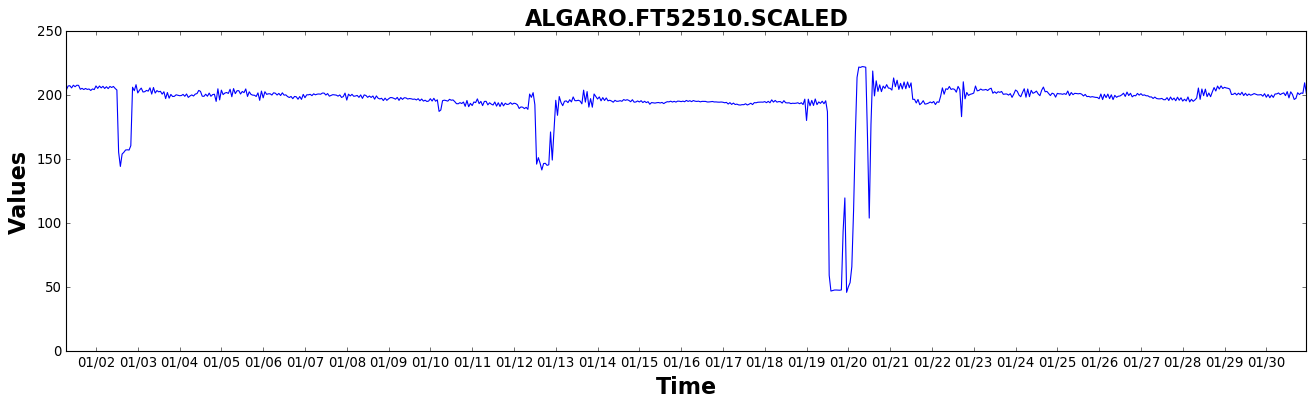

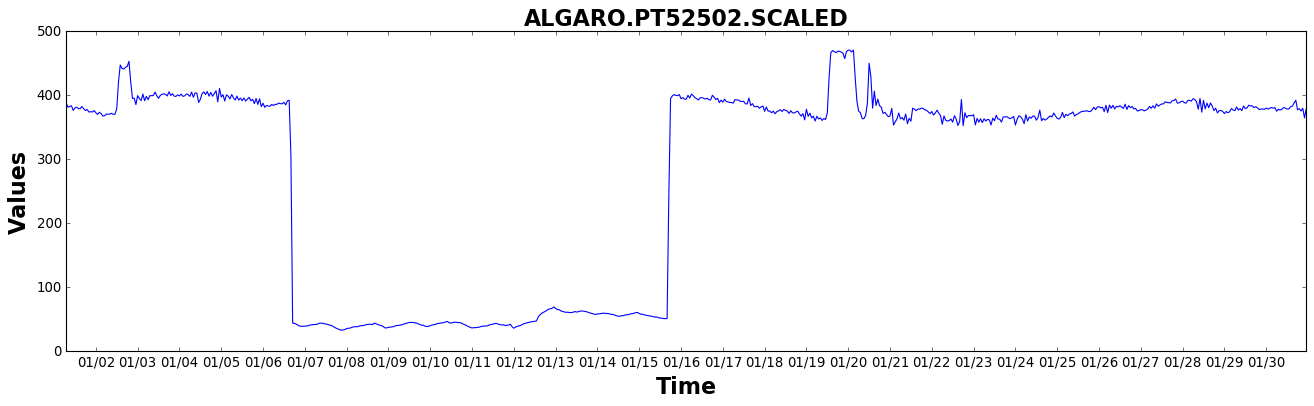

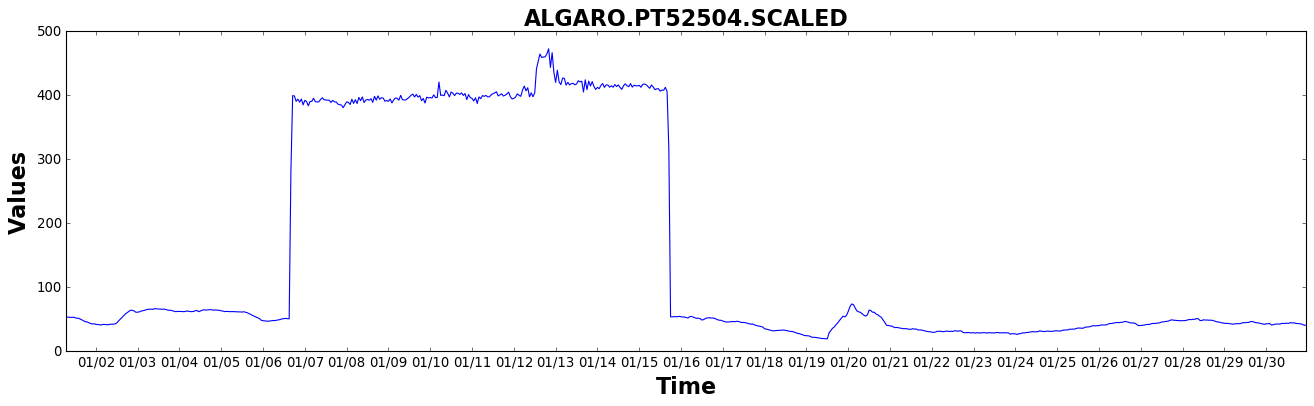

In [7]:
#06-01-2017 14:10	22-10-2017 23:15	25-04-2017 10:05	25-04-2017 10:07	
#(T/A) Install 316 Injection Quill For FE242
# Visible in pressure


line_plot(df_dict['ALGARO.FT52510.SCALED'], ['2017-01-1','2017-01-30'], 'ALGARO.FT52510.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52502.SCALED'], ['2017-01-1','2017-01-30'], 'ALGARO.PT52502.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52504.SCALED'], ['2017-01-1','2017-01-30'], 'ALGARO.PT52504.SCALED', 'timestamp',1,'Time', 'Values')


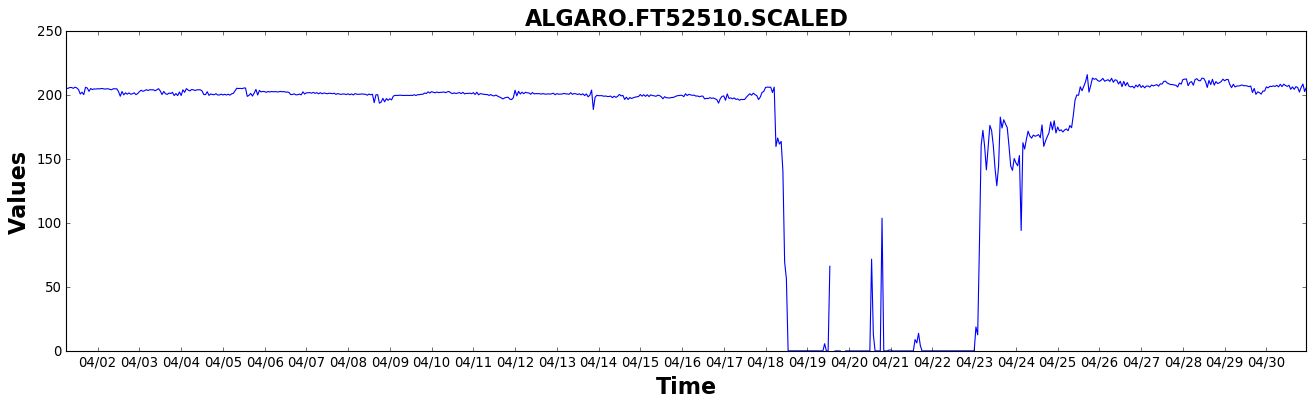

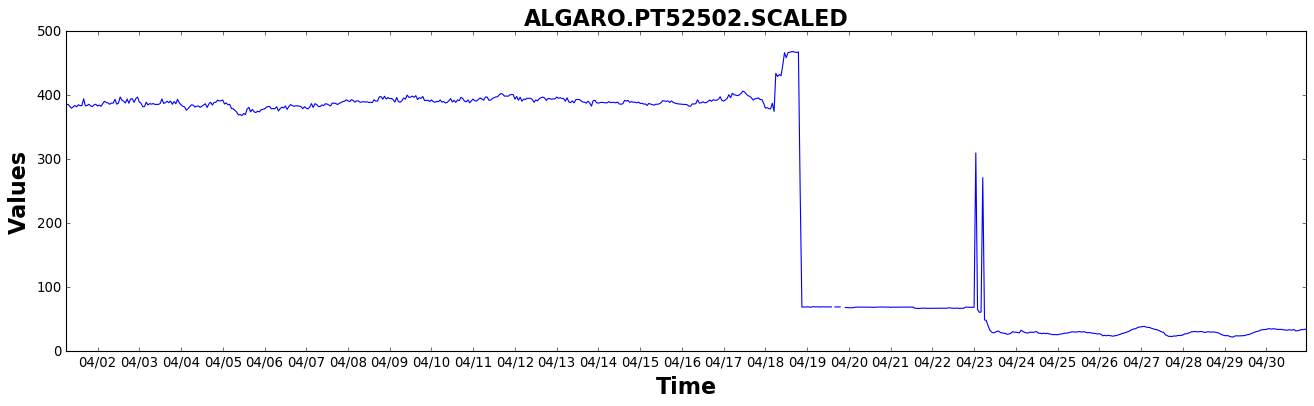

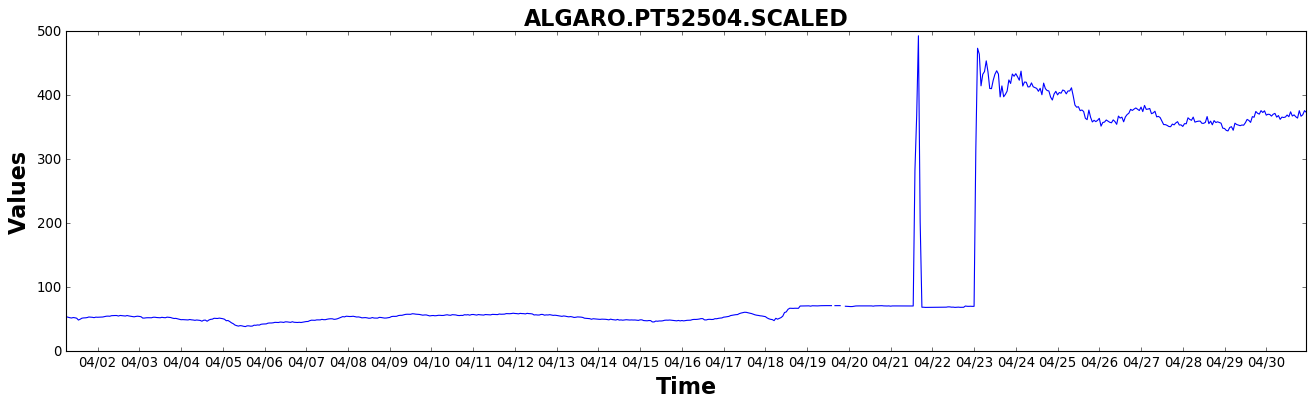

In [8]:
#03-04-2017 16:01	07-10-2017 23:15	10-04-2017 14:05	10-04-2017 15:58	10-04-2017 14:05	Spool Measurements for P-525 Pump common discharge.
#25-04-2017 20:11	19-11-2017 23:15	23-05-2017 10:34	23-05-2017 16:19	23-05-2017 10:34	P-525A seak leak

#Slight decrease in pressure

line_plot(df_dict['ALGARO.FT52510.SCALED'], ['2017-04-1','2017-04-30'], 'ALGARO.FT52510.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52502.SCALED'], ['2017-04-1','2017-04-30'], 'ALGARO.PT52502.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52504.SCALED'], ['2017-04-1','2017-04-30'], 'ALGARO.PT52504.SCALED', 'timestamp',1,'Time', 'Values')


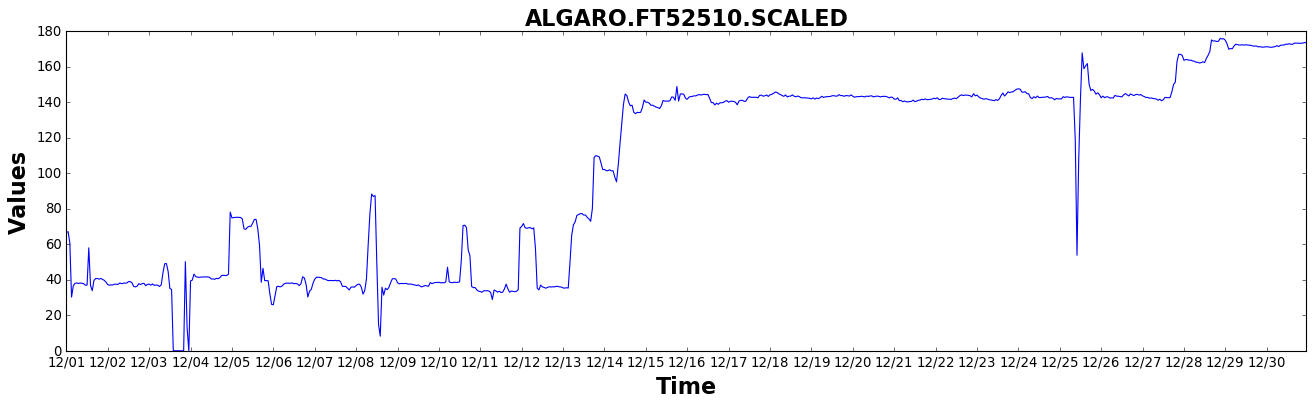

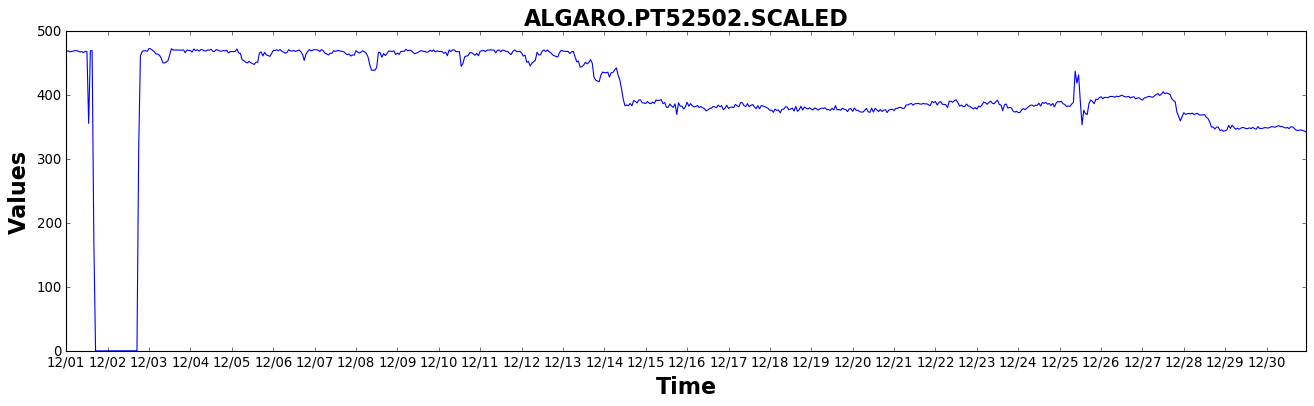

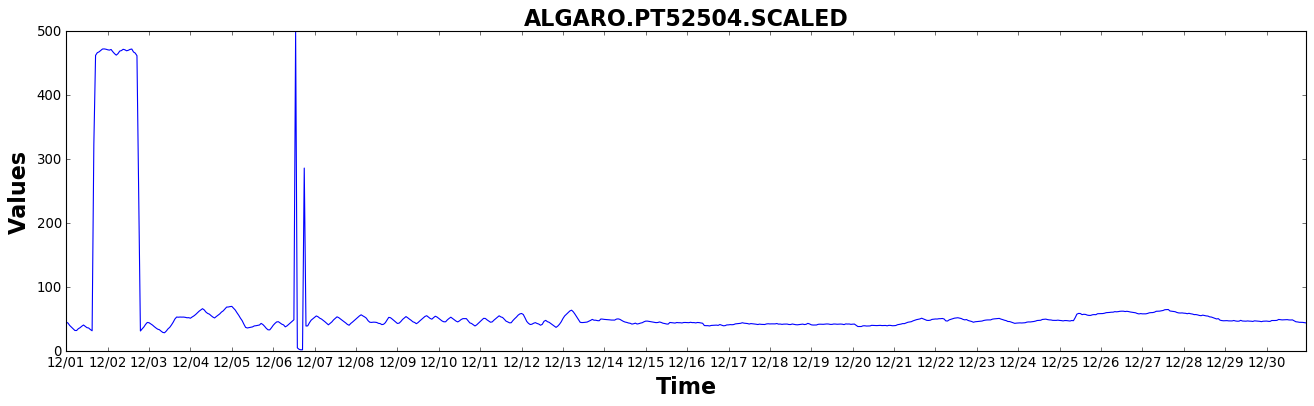

In [9]:
# 01-12-2018 09:23	03-06-2019 23:15	05-12-2018 07:35	05-12-2018 07:36	05-12-2018 07:36	P-525A Mechanical Seal Leaking
# 02-12-2018 13:22	13-06-2019 23:15	15-12-2018 07:04	15-12-2018 16:12	15-12-2018 07:04	P525B seal leak
#Leak visible in pressure intially and flow ater few days 

line_plot(df_dict['ALGARO.FT52510.SCALED'], ['2018-12-1','2018-12-30'], 'ALGARO.FT52510.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52502.SCALED'], ['2018-12-1','2018-12-30'], 'ALGARO.PT52502.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52504.SCALED'], ['2018-12-1','2018-12-30'], 'ALGARO.PT52504.SCALED', 'timestamp',1,'Time', 'Values')


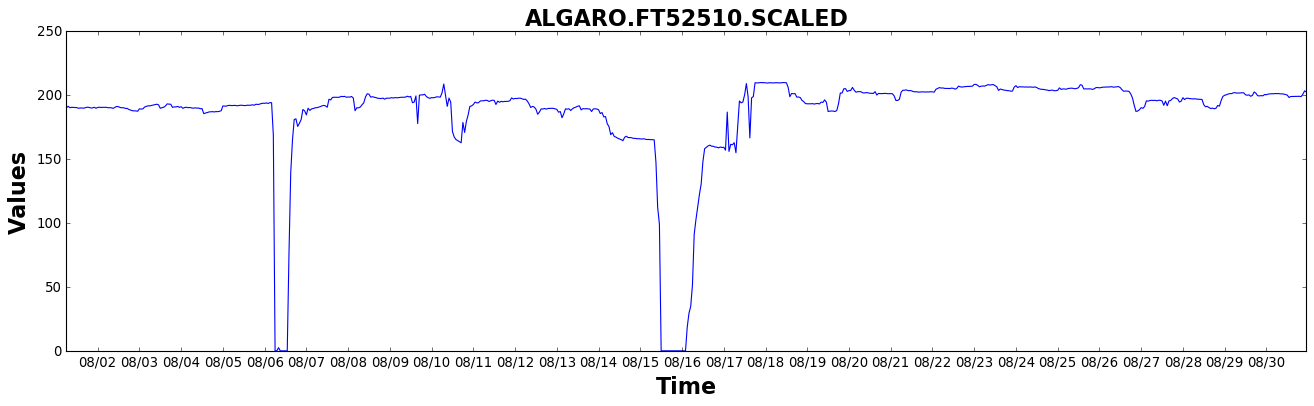

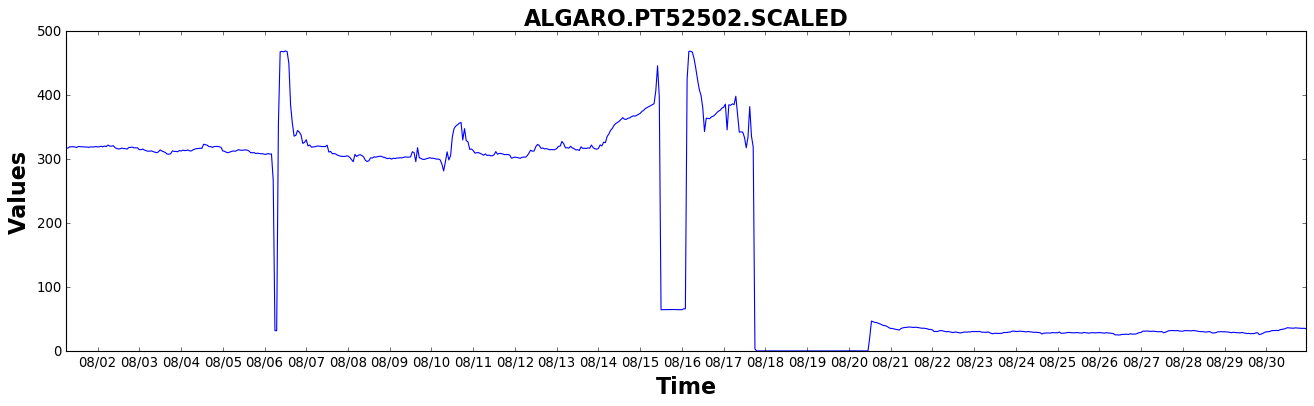

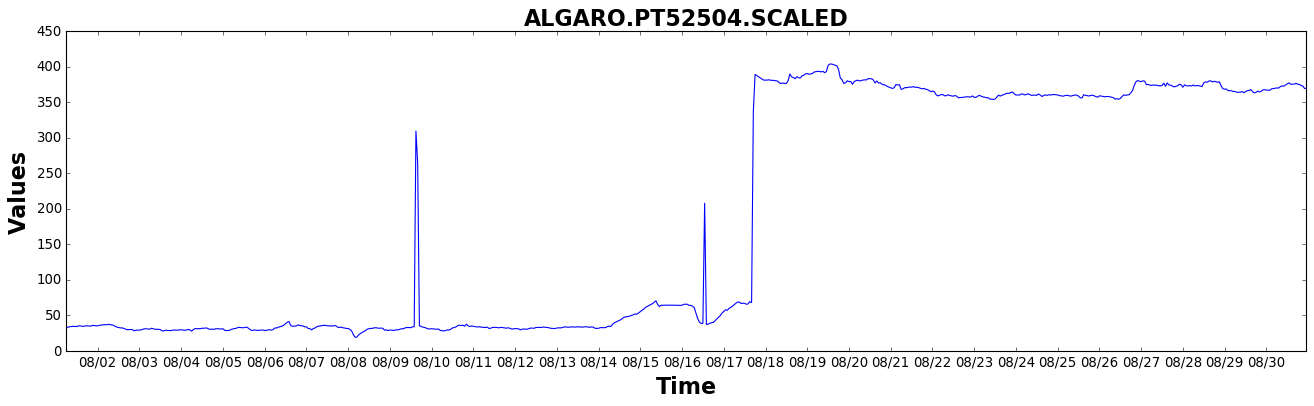

In [10]:
#17-08-2019 11:46	17-05-2020 23:15	19-11-2019 07:36	19-11-2019 07:36	19-11-2019 07:36	P-525A needs to be rebuilt
#Visible in all three
line_plot(df_dict['ALGARO.FT52510.SCALED'], ['2019-08-1','2019-08-30'], 'ALGARO.FT52510.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52502.SCALED'], ['2019-08-1','2019-08-30'], 'ALGARO.PT52502.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52504.SCALED'], ['2019-08-1','2019-08-30'], 'ALGARO.PT52504.SCALED', 'timestamp',1,'Time', 'Values')


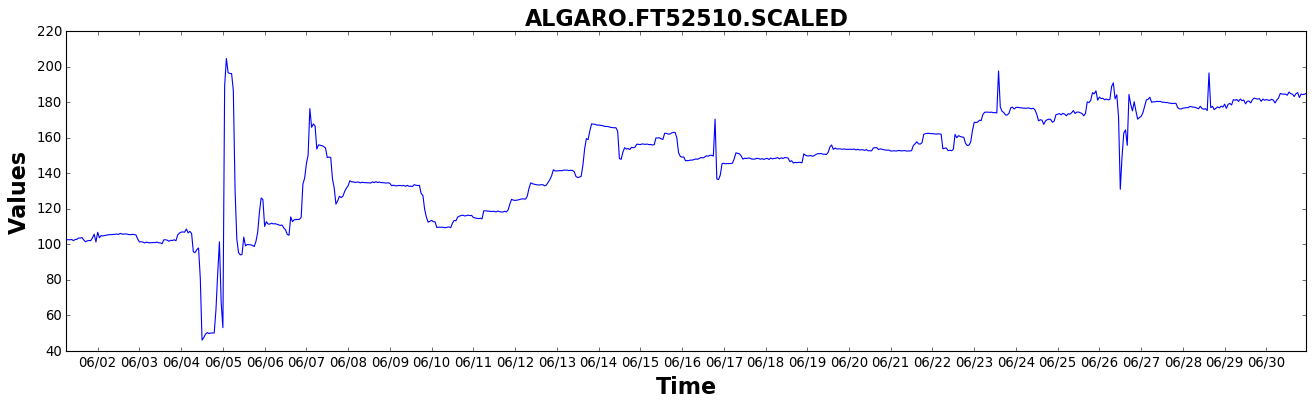

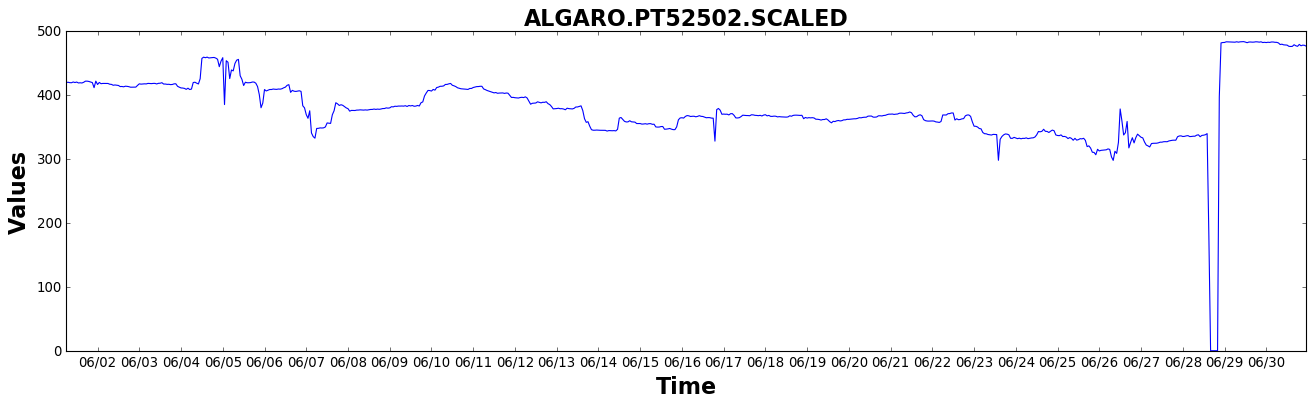

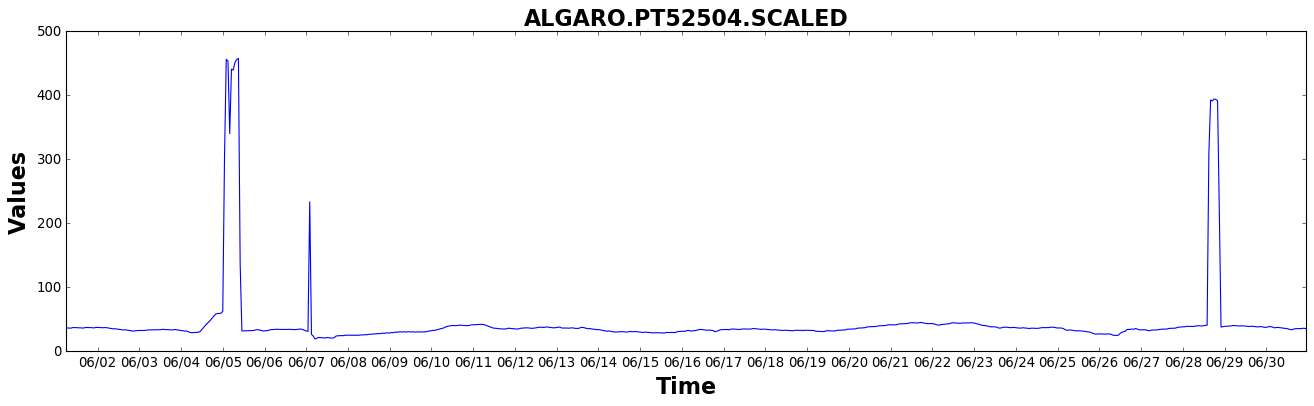

In [11]:
#28-06-2020 15:50	07-07-2020 16:13	28-06-2020 15:56	28-06-2020 15:57	28-06-2020 15:56	
#P-525A Inspection and repair
#Pressure drop in a so repair ordered

line_plot(df_dict['ALGARO.FT52510.SCALED'], ['2020-06-1','2020-06-30'], 'ALGARO.FT52510.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52502.SCALED'], ['2020-06-1','2020-06-30'], 'ALGARO.PT52502.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['ALGARO.PT52504.SCALED'], ['2020-06-1','2020-06-30'], 'ALGARO.PT52504.SCALED', 'timestamp',1,'Time', 'Values')
